In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

from scipy.stats import uniform

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.svm import LinearSVC, LinearSVR

from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN


In [72]:
data = pd.read_csv('clean.csv', header=0)
data

,Date,Open,High,Low,Close,Volume,p_sma_5,p_sma_10,p_sma_20,p_sma_50,...,cmo_signal,dmi,ko,ko_signal,smi,smi_signal,target,golden_cross,dead_cross,ma_50_vs_200
0,1986-12-26,246.750000,247.089996,246.729996,246.919998,48860000,247.697998,247.842999,249.416500,245.331000,...,-23.760447,48.009243,-5.195933e+08,-5.207434e+08,-49.868806,-43.480796,1,0,0,1
1,1986-12-29,246.899994,246.919998,244.309998,244.669998,99800000,246.685999,247.574998,249.189000,245.433800,...,-26.438338,42.540143,-6.510150e+08,-5.393537e+08,-60.984404,-52.232600,1,0,0,1
2,1986-12-30,244.660004,244.669998,243.039993,243.369995,126200000,245.609998,247.090997,248.905000,245.524400,...,-26.830422,38.542213,-8.775885e+08,-5.876729e+08,-69.608947,-60.920773,1,0,0,1
3,1986-12-31,243.369995,244.029999,241.279999,242.169998,139200000,244.775998,246.303998,248.313499,245.648400,...,-34.117087,30.814516,-1.109652e+09,-6.622413e+08,-72.407873,-66.664323,1,0,0,1
4,1987-01-02,242.169998,246.449997,242.169998,246.449997,91880000,244.715997,246.192998,247.943499,245.859800,...,-20.843762,49.306419,-9.772393e+08,-7.072410e+08,-52.576828,-59.620575,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8988,2022-08-25,4153.259766,4200.540039,4147.589844,4199.120117,2976050000,4167.018066,4227.536084,4187.390552,3990.834619,...,7.188892,57.057106,1.352025e+10,2.180170e+10,-33.739030,-17.749266,0,0,0,0
8989,2022-08-26,4198.740234,4203.040039,4057.659912,4057.659912,3175260000,4132.854053,4205.287085,4183.759045,3996.188018,...,-3.115869,42.844444,8.563717e+09,1.991056e+10,-51.071411,-34.410339,0,0,0,0
8990,2022-08-29,4034.580078,4062.989990,4017.419922,4030.610107,2963020000,4111.378027,4178.634082,4179.358057,4003.464819,...,-8.925118,36.222988,8.615072e+08,1.718926e+10,-63.918175,-49.164257,0,0,0,0
8991,2022-08-30,4041.250000,4044.979980,3965.209961,3986.159912,3190580000,4082.864014,4146.730054,4174.106555,4009.691216,...,-23.775788,28.190144,-6.630603e+09,1.378643e+10,-70.673139,-59.918698,0,0,0,0


# Question to ask

In [73]:
# Assuming 'data' is your DataFrame
y = data["target"]  # Define target
X = data.drop(columns=['Date', 'target'])  # Define features

# Define train and test percentages
train_pct = 0.7
test_pct = 0.3

# Calculate the number of training samples
n_train = int(train_pct * len(X))

# Split the dataset into train and test sets
X_train = X.iloc[:n_train]
y_train = y.iloc[:n_train]
X_test = X.iloc[n_train:]
y_test = y.iloc[n_train:]


In [74]:
y = data["target"]  # Define target
X = data.drop(columns=['Date', 'target'])  # Define features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Logistic Regression without Regularization

In [75]:
steps_logit = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('logit', LogisticRegression(penalty=None))
                 ]

pl_logit = Pipeline(steps_logit)

In [76]:
pl_logit.fit(X_train,y_train)
y_pred = pl_logit.predict(X_test)  # predicted class label
y_prob = pl_logit.predict_proba(X_test)[:, 1]   #predicted probability

In [77]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_logit = pd.DataFrame([['Logit', acc,prec,rec, f1,roc]],
                                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results_logit

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.579689,0.598605,0.826059,0.694175,0.559412


In [78]:
# create confustion matrix
CM = metrics.confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

fig, ax=plt.subplots()
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix'); plt.ylabel('Actual label'); plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['DOWN', 'UP']); ax.yaxis.set_ticklabels(['DOWN', 'UP'])

[Text(0, 0.5, 'DOWN'), Text(0, 1.5, 'UP')]

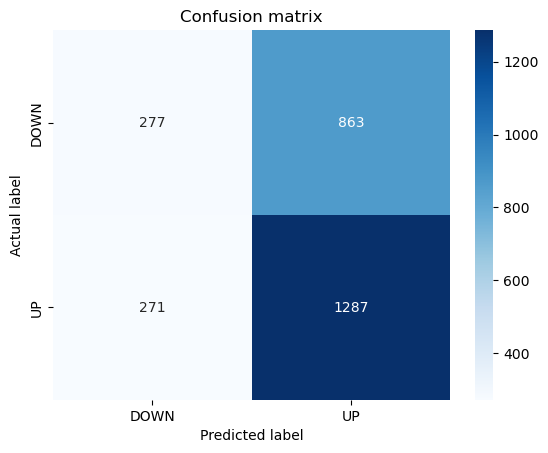

In [79]:
plt.show()

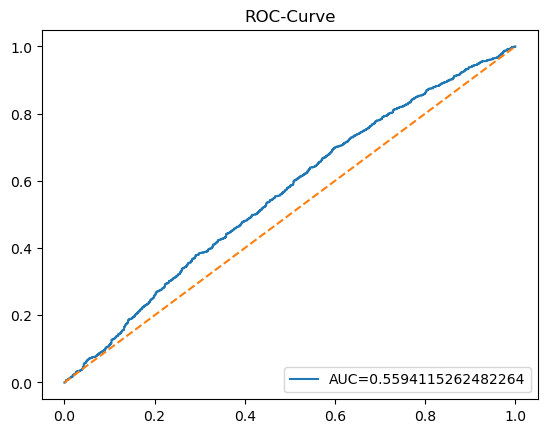

In [80]:
fpr, tpr, _=metrics.roc_curve(y_test, y_prob)
auc=metrics.roc_auc_score(y_test, y_prob)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--') # plot no skill
plt.title('ROC-Curve')
plt.show()

# Logistic Regression with Default Regularization

In [81]:
# Pipeline
# Steps
steps_logit_reg = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('logit_reg', LogisticRegression())
                 ]

pl_logit_reg = Pipeline(steps_logit_reg)

In [82]:
pl_logit_reg.fit(X_train,y_train)
y_pred = pl_logit_reg.predict(X_test)  # predicted class label
y_prob = pl_logit_reg.predict_proba(X_test)[:, 1]   #predicted probability
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_logit_reg = pd.DataFrame([['Logit_reg', acc,prec,rec, f1,roc]],
                                   columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results_logit_reg

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit_reg,0.583024,0.600371,0.831194,0.697174,0.558502


In [83]:
# create confustion matrix
CM = metrics.confusion_matrix(y_test, y_pred)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

fig, ax=plt.subplots()
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix'); plt.ylabel('Actual label'); plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['DOWN', 'UP']); ax.yaxis.set_ticklabels(['DOWN', 'UP'])

[Text(0, 0.5, 'DOWN'), Text(0, 1.5, 'UP')]

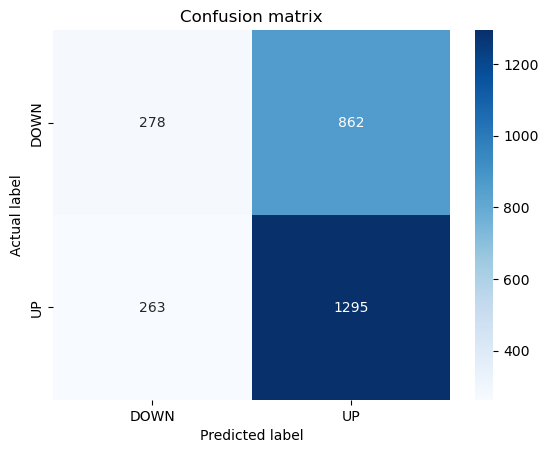

In [84]:
plt.show()

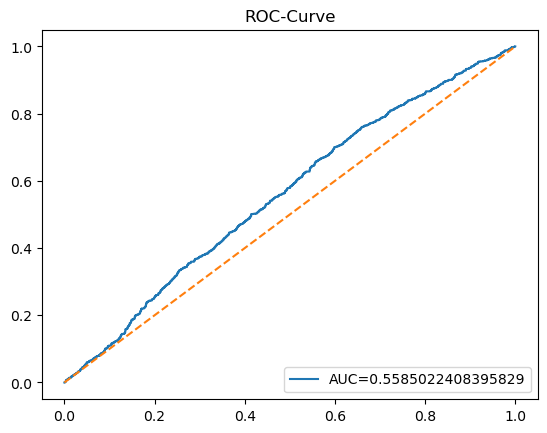

In [85]:
fpr, tpr, _=metrics.roc_curve(y_test, y_prob)
auc=metrics.roc_auc_score(y_test, y_prob)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], linestyle='--') # plot no skill
plt.title('ROC-Curve')
plt.show()

In [86]:
pd.concat([results_logit, results_logit_reg], axis=0, ignore_index=True)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.579689,0.598605,0.826059,0.694175,0.559412
1,Logit_reg,0.583024,0.600371,0.831194,0.697174,0.558502


# Stochastic Gradient Descent Classifier

In [87]:
# Pipeline
# Steps
steps_sgdc = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
              ('sgdc', SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15, learning_rate='optimal', random_state=1))
             ]

pl_sgdc = Pipeline(steps_sgdc)

In [88]:
pl_sgdc.fit(X_train,y_train)
y_pred = pl_sgdc.predict(X_test)  # predicted class label
y_prob = pl_sgdc.predict_proba(X_test)[:, 1]   #predicted probability

In [89]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results_sgdc = pd.DataFrame([['SGDClassifier', acc,prec,rec, f1,roc]],
                               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

pd.concat([results_logit, results_logit_reg, results_sgdc], axis=0, ignore_index=True)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.579689,0.598605,0.826059,0.694175,0.559412
1,Logit_reg,0.583024,0.600371,0.831194,0.697174,0.558502
2,SGDClassifier,0.555967,0.598901,0.699615,0.645352,0.533662


# Decision Tree

In [90]:
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)  # predicted class label
y_prob = dtc.predict_proba(X_test)[:, 1]   #predicted probability
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_prob)

results = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results_dtc = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
                           columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

pd.concat([results_logit, results_logit_reg, results_sgdc, results_dtc], axis=0, ignore_index=True)

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.579689,0.598605,0.826059,0.694175,0.559412
1,Logit_reg,0.583024,0.600371,0.831194,0.697174,0.558502
2,SGDClassifier,0.555967,0.598901,0.699615,0.645352,0.533662
3,Decision Tree,0.694589,0.744993,0.716303,0.730366,0.690608


# SVM Classifier

In [91]:
svc = LinearSVC(random_state=1)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)  # predicted class label
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = "N/A"

results_svc = pd.DataFrame([['SVM Classifier', acc,prec,rec, f1, roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

pd.concat([results_logit, results_logit_reg, results_sgdc, results_dtc, results_svc], axis=0, ignore_index=True)


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.579689,0.598605,0.826059,0.694175,0.559412
1,Logit_reg,0.583024,0.600371,0.831194,0.697174,0.558502
2,SGDClassifier,0.555967,0.598901,0.699615,0.645352,0.533662
3,Decision Tree,0.694589,0.744993,0.716303,0.730366,0.690608
4,SVM Classifier,0.570423,0.579450,0.933890,0.715163,N/A


In [92]:
results = pd.concat([results_logit, results_logit_reg, results_sgdc, results_dtc, results_svc], axis=0, ignore_index=True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logit,0.579689,0.598605,0.826059,0.694175,0.559412
1,Logit_reg,0.583024,0.600371,0.831194,0.697174,0.558502
2,SGDClassifier,0.555967,0.598901,0.699615,0.645352,0.533662
3,Decision Tree,0.694589,0.744993,0.716303,0.730366,0.690608
4,SVM Classifier,0.570423,0.579450,0.933890,0.715163,N/A
